In [22]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [66]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
def plotcompare(data_dict,metric='Accuracy'):
    # Marker styles for each metric
    markers = {'SelectMicro': 'o', 'Lasso': 's', 'SelectMicrro_Lasso': '^'}
    labels = {'SelectMicro': 'SelectMicro', 'Lasso': 'Lasso', 'SelectMicrro_Lasso': 'SelectMicrro_Lasso'}
    
    # Plot each element in the dataset
    plt.figure(figsize=(8, 6))
    if metric=='AUC':
        j=2
    else:
        j=1

    # Create a list to collect the line handles for the legend
    line_handles = []

    
    # Iterate over the outer dictionary (keys are 'Smocky_Burn', 'Smocky_urban', etc.)
    for region, metrics in data_dict.items():
        # Collect all points for the region
        x_vals = []
        y_vals = []
        
        # Collect points for each metric
        for method, values in metrics.items():
            x_vals.append(values[0])  # First element (x-coordinate)
            y_vals.append(values[j])  # Second element (y-coordinate)
            
            # Plot the point for each metric with different markers based on the metric name
            plt.scatter(values[0], values[j], marker=markers[method], color='black')
    
       # Plot the line connecting the points for the region and store the line handle for the legend
        line_handle, = plt.plot(x_vals, y_vals, label=f"{region}")
        line_handles.append(line_handle)
    
    # Create custom legend handles for the markers with black color
    legend_handles = [Line2D([0], [0], marker=markers[method], color='black', markerfacecolor='black', markersize=8, label=labels[method]) for method in markers]
    
    # Set labels and title
    plt.xlabel('Number of Features Selected')
    plt.ylabel(metric)
    plt.title(f'{metric} of each Feature Selection Method in each dataset')
    
    # Display the legend with both line handles and marker handles
    plt.legend(handles=line_handles + legend_handles)
    
    
    # Show the plot
    plt.grid(True)
    plt.show()

In [74]:
summary_data_RF = {'Smocky_Burn':{'SelectMicro':[56,0.89697,1],
                              'Lasso':[14,0.913636,1],
                              'SelectMicrro_Lasso':[15,	0.930303,1]},
                'Smocky_urban':{'SelectMicro':[29,0.627273,	0.658413],
                              'Lasso':[11,0.712121,	0.761905],
                              'SelectMicrro_Lasso':[14,	0.748485,0.762063]},
                'Smocky_Annual':{'SelectMicro':[19,0.760606,0.81625],
                              'Lasso':[7,0.780303,0.813393],
                              'SelectMicrro_Lasso':[12,	0.780303,0.861071]}
               }

In [68]:
# Convert to DataFrame
for datatype, subset in summary_data_RF.items():
    df = pd.DataFrame(subset).T
    df.columns=['Number','ACC','AUC']
    print(datatype)
    print(df)

Smocky_Burn
                    Number       ACC  AUC
SelectMicro           56.0  0.896970  1.0
Lasso                 14.0  0.913636  1.0
SelectMicrro_Lasso    15.0  0.930303  1.0
Smocky_urban
                    Number       ACC       AUC
SelectMicro           29.0  0.627273  0.658413
Lasso                 11.0  0.712121  0.761905
SelectMicrro_Lasso    14.0  0.748485  0.762063
Smocky_Annual
                    Number       ACC       AUC
SelectMicro           19.0  0.760606  0.816250
Lasso                  7.0  0.780303  0.813393
SelectMicrro_Lasso    12.0  0.780303  0.861071


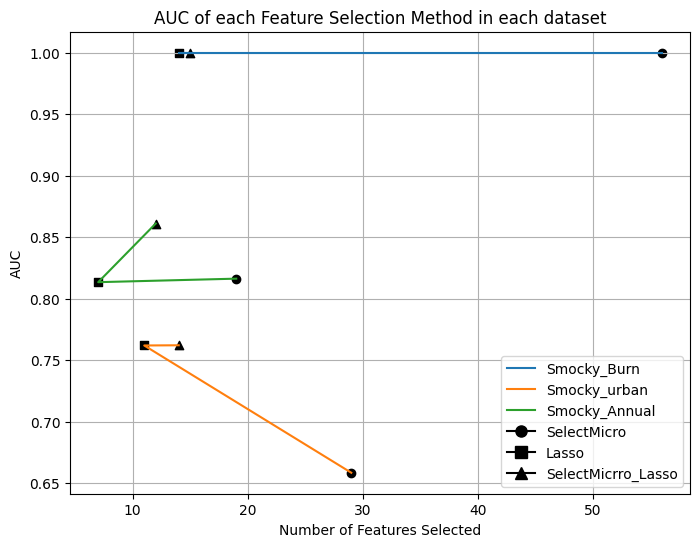

In [69]:
plotcompare(summary_data_RF,metric='AUC')

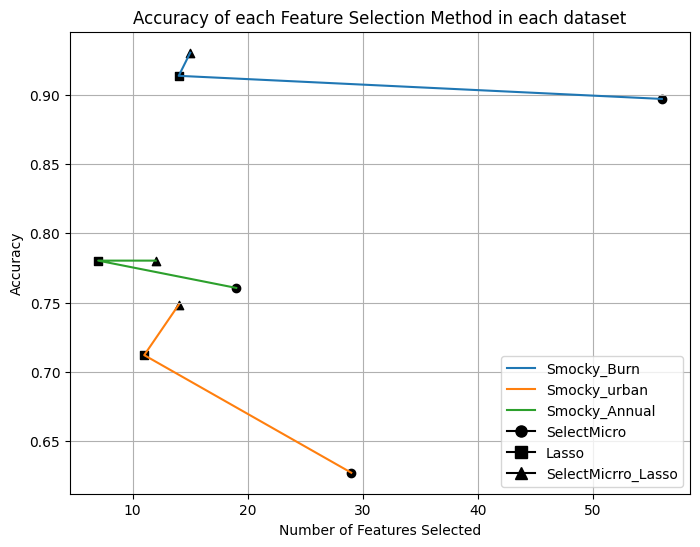

In [70]:
plotcompare(summary_data_RF)

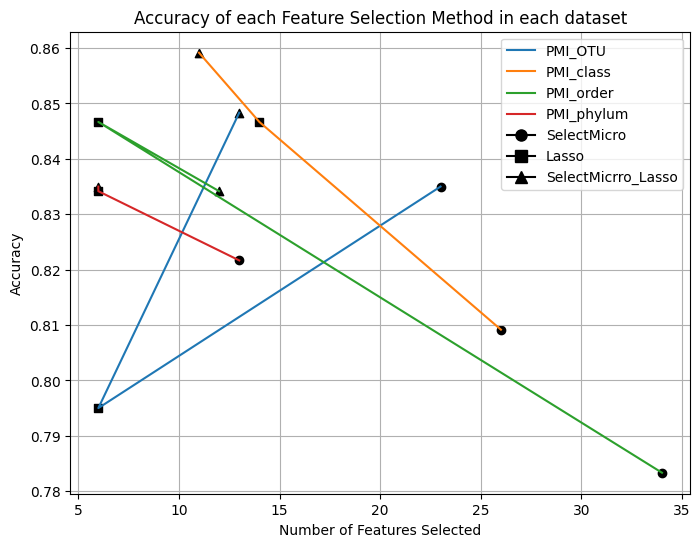

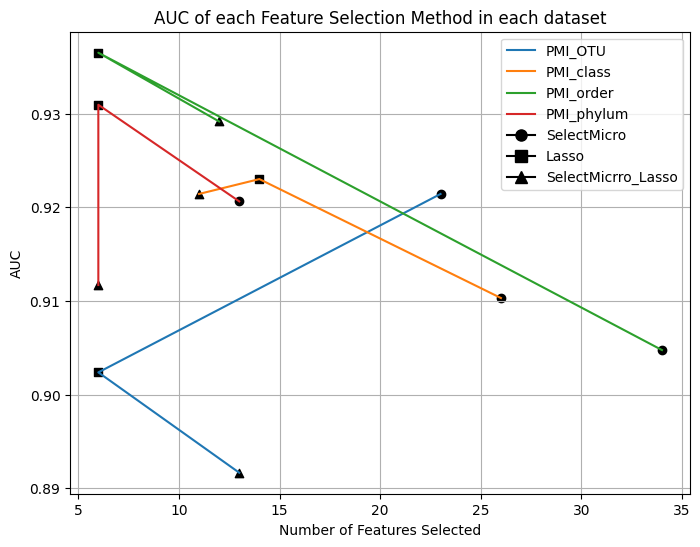

In [72]:
summary_RF_PMI = {'PMI_OTU':{'SelectMicro':[23,0.835000,0.921429],
                              'Lasso':[6,0.795000,0.902381],
                              'SelectMicrro_Lasso':[13,	0.848333,0.891667]},
                   'PMI_class':{'SelectMicro':[26,0.809167,0.910317],
                              'Lasso':[14,0.846667,0.923016],
                              'SelectMicrro_Lasso':[11,	0.859167,0.921429]},
                   'PMI_order':{'SelectMicro':[34,0.783333,0.904762 ],
                              'Lasso':[6,0.846667,0.936508],
                              'SelectMicrro_Lasso':[12,	0.834167,0.929167]},
                   'PMI_phylum':{'SelectMicro':[13,0.821667, 0.920635 ],
                              'Lasso':[6,0.834167,0.930952 ],
                              'SelectMicrro_Lasso':[6,	0.835,0.911706 ]}
                 }
plotcompare(summary_RF_PMI)
plotcompare(summary_RF_PMI,metric='AUC')
